In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def expon_pdf(x):
    return np.where(x>=0, 0.2*np.exp(-x/5), 0)

In [168]:
def sampling(func, n=1, sigma=50):
    sample = np.zeros(n)
    sample[0] = np.random.random()
    for i in range(n-1):
        x_prev = sample[i].copy()
        xp = np.random.normal(0, sigma)
        alpha = func(xp)/func(x_prev) if func(x_prev)!=0. else 1
        u = np.random.random()
        sample[i+1] = xp if u<=alpha else x_prev
    return sample

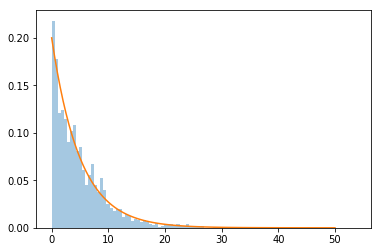

In [169]:
x = np.linspace(0, 50, 100)
y = expon_pdf(x)

sns.distplot(sampling(expon_pdf, 21000, sigma=50)[1000:], kde=False, norm_hist=True, bins=100)
sns.lineplot(x, y)
plt.show()

In [201]:
n = 100
# s = np.random.choice(sampling(expon_pdf, 21000, sigma=50)[1000:], n)
s = (-5*np.log(1-np.random.random(n)))
def posterior(theta):
    if theta>2 and theta<9:
        return 1/theta**n*np.exp(-np.sum(s)/theta)
    else:
        return 0

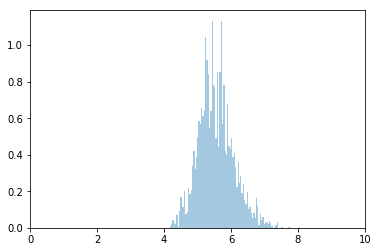

In [209]:
s2 = sampling(posterior, 31000, sigma=5)[1000:]
sns.distplot(s2, norm_hist=True, bins=100, kde=False)
plt.xlim(0,10)
plt.show()